0. Preparing Data

In [102]:
import tensorflow as tf
import os

In [103]:
#Remove dodgy images

import cv2
import imghdr
import matplotlib.pyplot as plt

In [104]:
data_dir = 'datasets'
#os.listdir(os.path.join(data_dir,'PetImages','Cat'))

In [105]:
image_exts = ['jpeg','jpg','bmp','png']

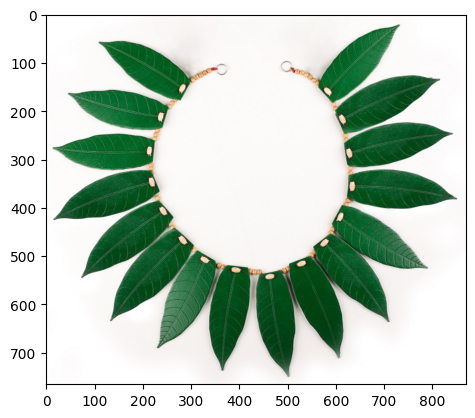

In [106]:
img_arr = cv2.imread(os.path.join(data_dir,'New folder','Mango','6.png'))
img_arr.shape
plt.imshow(cv2.cvtColor(img_arr,cv2.COLOR_BGR2RGB))
plt.show()

1. Load Data

In [107]:
import numpy as np

In [108]:

data = tf.keras.utils.image_dataset_from_directory(os.path.join(data_dir,'New folder'))

Found 436 files belonging to 3 classes.


In [110]:
encoder = OneHotEncoder(sparse_output=False)

In [111]:
data_iterator = data.as_numpy_iterator()

In [112]:
batch = data_iterator.next()

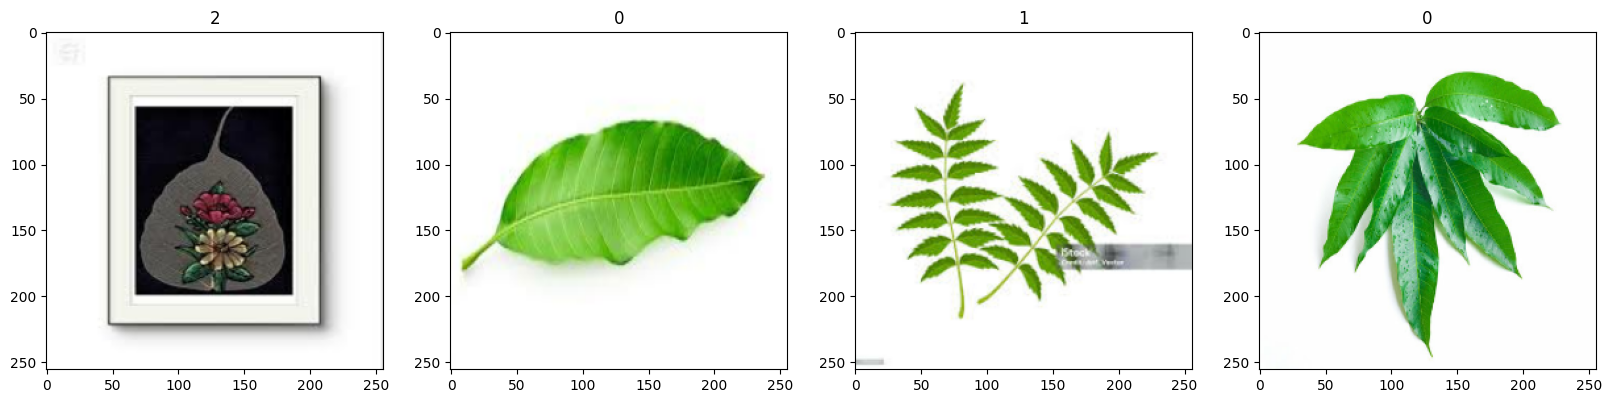

In [113]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
# Mango - 0 , Neem - 1, Peepal - 2

2. Preprocess Data

In [114]:
data = data.map(lambda x,y: (x/255,y))

In [115]:
print(data)

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [116]:
scaled_iterator = data.as_numpy_iterator()

In [117]:
batch = scaled_iterator.next()

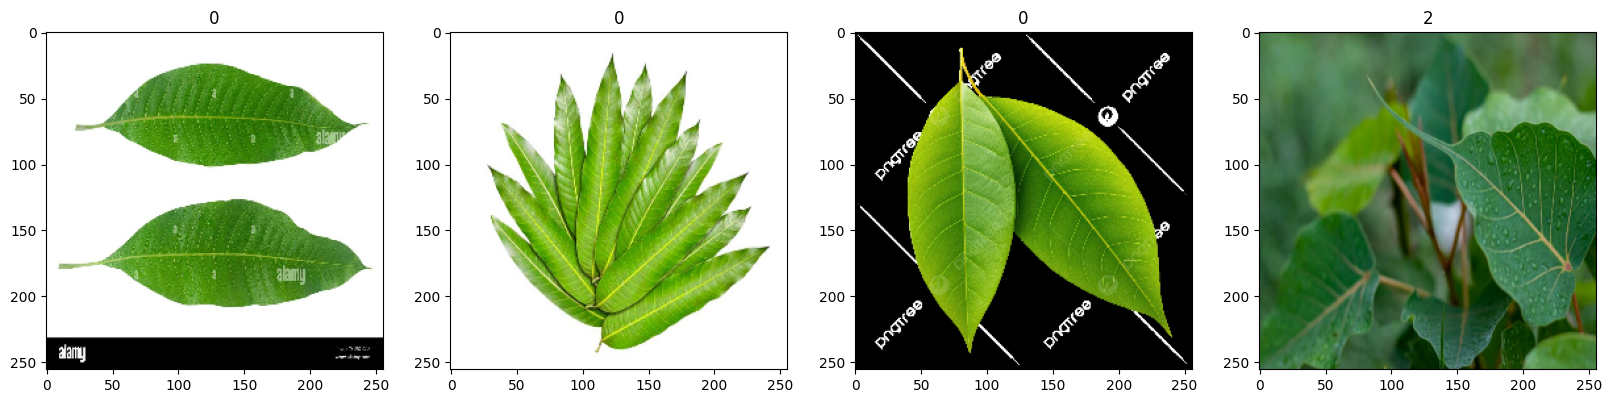

In [118]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
# Mango - 0 , Neem - 1, Peepal - 2

In [119]:
len(data)

14

In [120]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2) + 1
test_size = int(len(data)*0.1) + 1

In [121]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(val_size)

3. Building the Model

In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [123]:
model = Sequential()

In [124]:
model.add(Conv2D(16,(3,3), 1, activation='relu',input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation ='relu'))
model.add(Dense(3, activation = 'softmax'))

c:\Users\arkis\My Files\Programming\Projects\dsenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [125]:
model.compile('adam', loss = tf.losses.CategoricalCrossentropy(), metrics = ['accuracy'])

In [126]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,697,139 (14.10 MB)

 Trainable params: 3,697,139 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [128]:
hist = model.fit(train, epochs = 40,validation_data= val)

Epoch 1/40


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 3)